### 일원배치 분산분석(One-way ANOVA)

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


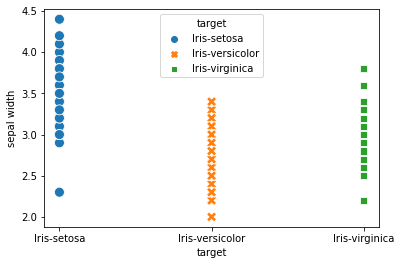

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)
         Multiple Comparison of Means - Tukey HSD, FWER=0.50         
     group1          group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------
    Iris-setosa Iris-versicolor   -0.648   0.0 -0.7246 -0.5714   True
    Iris-setosa  Iris-virginica   -0.444   0.0 -0.5206 -0.3674   True
Iris-versicolor  Iris-virginica    0.204 0.009  0.1274  0.2806   True
---------------------------------------------------------------------


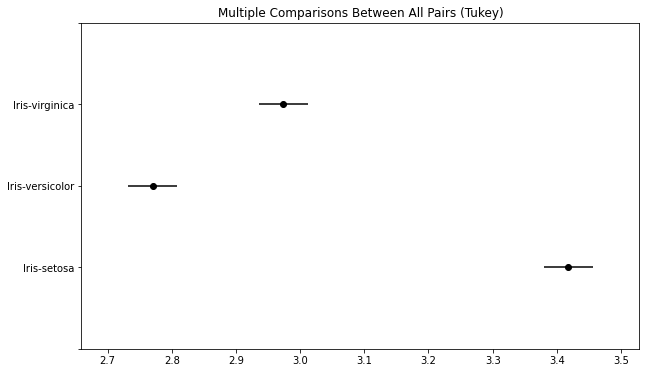

In [37]:
# iris 데이터 이용하여 일원배치 분산분석 해보기
import pandas as pd

iris = pd.read_csv('./data/Iris.csv')
iris.columns = ['order', 'sepal length', 'sepal width', 'petal length', 'petal width', 'target']
iris.drop(columns='order', inplace=True)

# target이 가지고 있는 변수 개수 확인
print(iris['target'].value_counts())

# target별로 변수에 할당하여 분산분석 해보기
target_list = iris.target.unique()
setosa = iris[iris['target'] == 'Iris-setosa'][['sepal width']]
versicolor = iris[iris['target'] == 'Iris-versicolor'][['sepal width']]
virginica = iris[iris['target'] == 'Iris-virginica'][['sepal width']]

# target 시각화 및 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
# scatter plot by groups
sns.scatterplot(x='target',
                y='sepal width',
                hue='target',
                style='target',
                s=100,
                data = iris) # marker size
plt.show()

# 시각화 결과, 3종류의 sepal width의 평균은 차이가 있어 보인다.
  # 통계적으로 차이가 있는지 검정해보자.
  # 귀무가설 : 세 가지 종에 대해 Sepal Width의 평균은 모두 같다.
  # 대립가설 : 적어도 하나의 종에 대한 Sepal Width 평균값에는 차이가 있다.

# shapiro test(정규성 검정)
import scipy.stats as stats

print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))
# 모두 p-value가 유의수준인 0.05보다 크므로 귀무가설을 채택한다.
  # 즉, 정규성을 만족한다.

# 이제 등분산성을 검정하자.
# levene(등분산성 검정)
stats.levene(setosa['sepal width'], versicolor['sepal width'], virginica['sepal width'])
# p-value가 유의수준인 0.05보다 크므로 귀무가설을 채택한다.
    # 즉, 등분산성을 만족한다.

# 이제 ANOVA를 진행해보자
stats.f_oneway(setosa, versicolor, virginica)

# 검정 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
    # 즉, 세 가지 종의 꽃받침 폭의 평균은 차이가 있다고 할 수 있다.

# 그렇다면 세 가지 종들 중 특히 어떤 종들 간 꽃받침 폭에 차이가 있는지 확인해보자
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data = iris['sepal width'], groups = iris['target'])
tuekeyhsd = pairwise_tukeyhsd(iris['sepal width'], groups= iris['target'], alpha=0.5)
fig = tuekeyhsd.plot_simultaneous()
print(tuekeyhsd.summary())

# 여기서 모든 p-value가 유의수준보다 작으므로 대립가설(집단들 사이의 평균은 같지 않다.)를 채택한다.
    # 즉, 모든 집단간 평균은 서로 같지 않다.

---

### 이원배치 분산분석(Two-way ANOVA)

In [49]:
import pandas as pd

mtcars = pd.read_csv('./data/mtcars.csv')

# cyl, am, mpg 변수들로만 구성된 데이터세트 생성
mtcars = mtcars[['mpg', 'am', 'cyl']]
print(mtcars.info())
print(mtcars['am'].unique())
print(mtcars['cyl'].unique())
# 종속변수 mpg는 연속형, 독립변수 am, cyl은 수치형이지만, 의미상 범주형 변수이다.

# 교호작용 검정
    # 귀무가설 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다.
    # 대립가설 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다.
# 주효과 검정 1
    # 귀무가설 : 실린더 개수에 따른 주행거리의 차이는 존재하지 않는다.
    # 대립가설 : 실린더 개수에 따른 주행거리의 차이는 존재한다.
# 주효과 검정 2
    # 귀무가설 : 변속기 종류에 따른 주행거리의 차이는 존재하지 않는다.
    # 대립가설 : 변속기 종류에 따른 주행거리의 차이는 존재한다.

# 분산분석하기
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'mpg ~ C(cyl) + C(am) + C(cyl) : C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes
None
[1 0]
[6 4 8]
                  sum_sq    df          F        PR(>F)
C(cyl)        456.400921   2.0  24.819011  9.354735e-07
C(am)          36.766919   1.0   3.998759  5.608373e-02
C(cyl):C(am)   25.436511   2.0   1.383233  2.686140e-01
Residual      239.059167  26.0        NaN           NaN


#### 결과 해석
1. C(cyl):C(am)의 p-value가 유의수준보다 크므로 귀무가설을 채택한다.
2. C(cyl)의 p-value가 유의수준보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
3. C(am)의 p-value가 유의수준보다 크므로 귀무가설을 채택한다.